In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

In [9]:
# Load the processed CSV file
df = pd.read_csv("../data/processed/part-00000-55078bd3-eca0-4078-8064-721c27ee24fc-c000.csv.csv",on_bad_lines='skip')

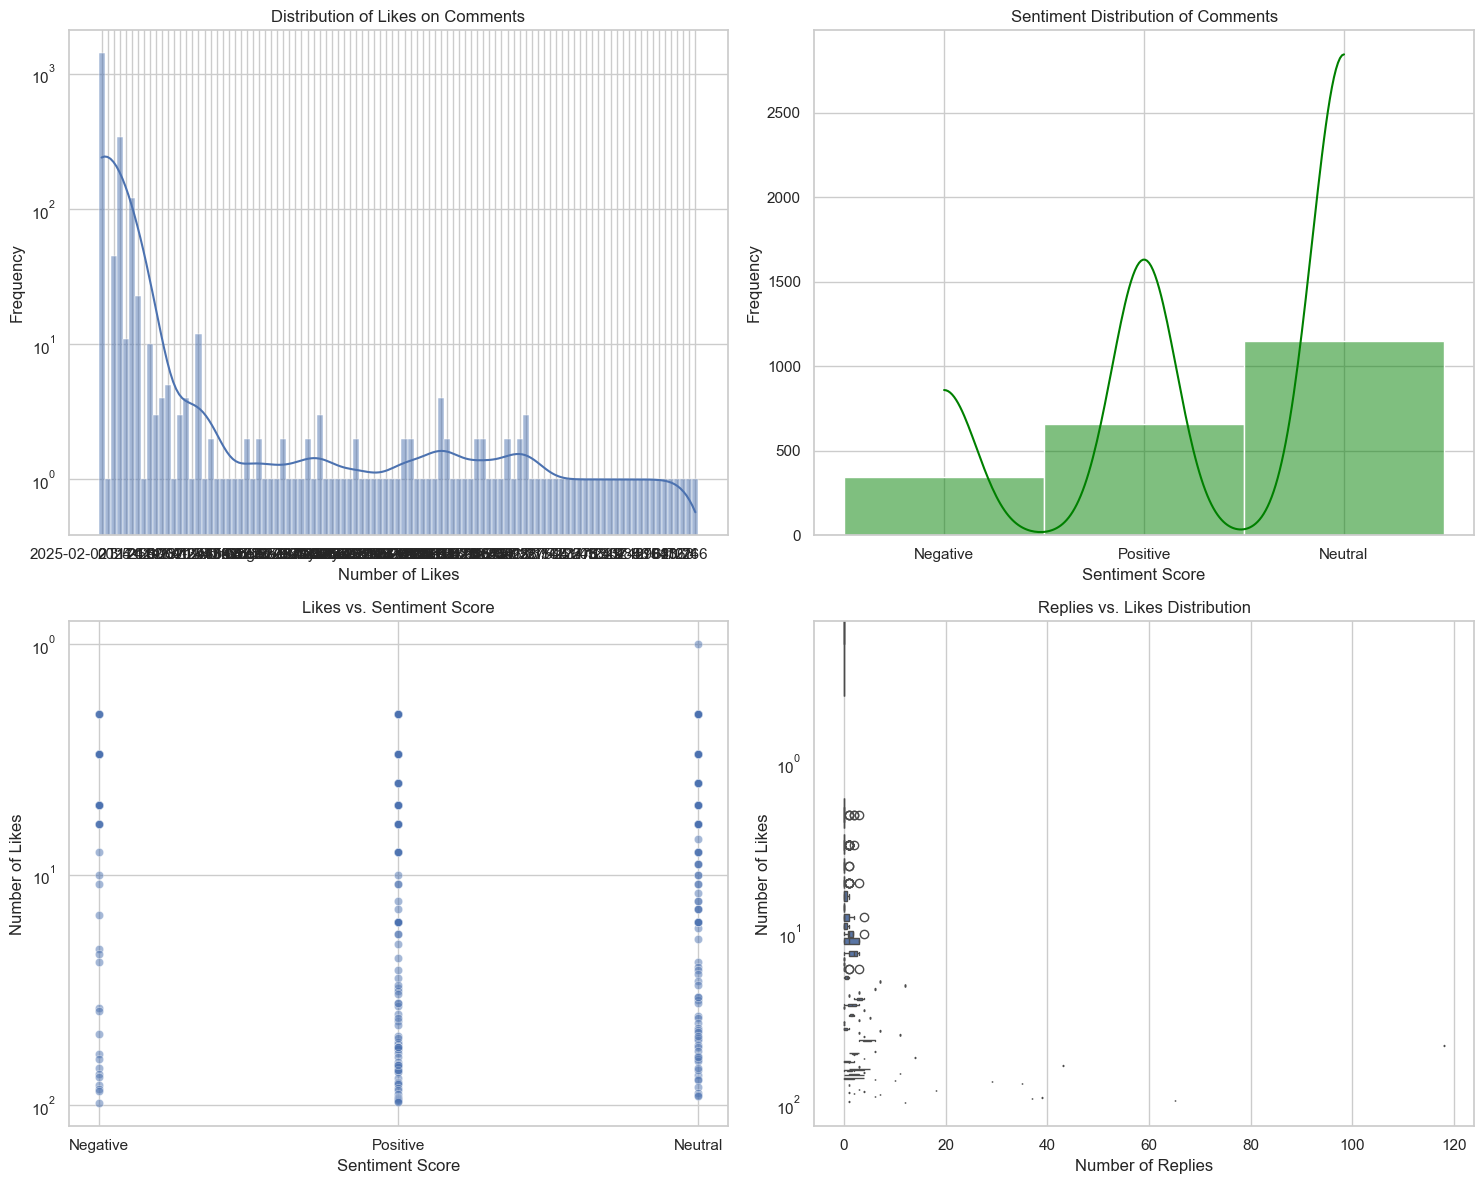

In [13]:
# Ensure 'comment' column is a string and drop NaN values
df['comment'] = df['comment'].astype(str).fillna('')

# Function to analyze sentiment
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity, blob.sentiment.subjectivity

# Apply sentiment analysis
df[['polarity', 'subjectivity']] = df['comment'].apply(lambda x: pd.Series(get_sentiment(x)))

def categorize_sentiment(polarity):
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

# Apply categorization
df["sentiment"] = df["polarity"].apply(categorize_sentiment)

# Set plot style
sns.set_theme(style="whitegrid")

# Create subplots for multiple visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Histogram of Likes Distribution (Log Scale)
sns.histplot(df['likes'], bins=50, kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Distribution of Likes on Comments")
axes[0, 0].set_xlabel("Number of Likes")
axes[0, 0].set_ylabel("Frequency")
axes[0, 0].set_yscale('log')  # Log scale to handle skew

# 2. Sentiment Distribution
sns.histplot(df['sentiment'], bins=30, kde=True, ax=axes[0, 1], color='green')
axes[0, 1].set_title("Sentiment Distribution of Comments")
axes[0, 1].set_xlabel("Sentiment Score")
axes[0, 1].set_ylabel("Frequency")

# 3. Scatter plot of Likes vs. Sentiment
sns.scatterplot(x=df['sentiment'], y=df['likes'], alpha=0.5, ax=axes[1, 0])
axes[1, 0].set_title("Likes vs. Sentiment Score")
axes[1, 0].set_xlabel("Sentiment Score")
axes[1, 0].set_ylabel("Number of Likes")
axes[1, 0].set_yscale('log')  # Log scale for better visualization

# 4. Replies vs. Likes (Boxplot to show distribution)
sns.boxplot(x=df['total_replies'], y=df['likes'], ax=axes[1, 1])
axes[1, 1].set_title("Replies vs. Likes Distribution")
axes[1, 1].set_xlabel("Number of Replies")
axes[1, 1].set_ylabel("Number of Likes")
axes[1, 1].set_yscale('log')  # Handle large variations in likes

# Adjust layout and show plots
plt.tight_layout()
plt.show()